In [23]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# iris is a simple multiclass classification algorithm
iris = datasets.load_iris()
# defining petal length, width
X=iris["data"][:,(2, 3)]
y=iris["target"]

In [17]:
# which flower is it???????????
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


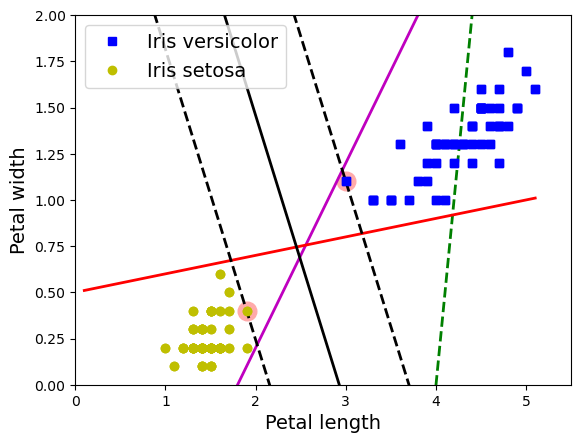

In [25]:
# now, let's create the SVM classifier model
# support vector classification declaration
# Use a very high value for C, but not infinity
svm_clf = SVC(kernel="linear", C=1e9)  # Example: using a very large number instead of infinity
svm_clf.fit(X, y)


w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]# we know at the decision boundary we have the line: w0x0 + w1x1 + b = 0
# this means x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(np.min(X), np.max(X), 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# here, we define our margin
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

svs = svm_clf.support_vectors_
# lets plot the data
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#----------------------------------------------------------
# here, lets plot the decision boundary and lines
# here we plot the decision boundary
plt.plot(x0, decision_boundary, "k-", linewidth=2)
# now, lets plot the upper boundary (margin)
plt.plot(x0, gutter_up, "k--", linewidth=2)
# lastly, the lower boundary (margin)
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.axis([0, 5.5, 0, 2])
plt.show()


In [26]:
# explanation of the above:
# 1. solid black line represents the optimal hyperplane
# 2. dashed black lines represent the margins (upper and lower) that maximize the distance between the optimal hyperplane and the corresponding data sets
# red, magenta, green lines are all arbitrary and simply act as a visual aid for better understanding the data
# see below for the raw SVM


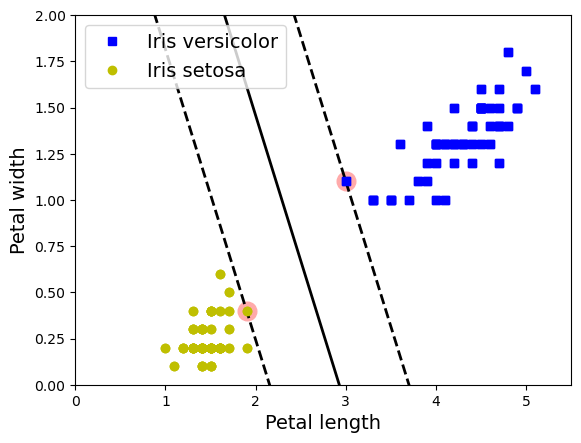

In [28]:
svm_clf = SVC(kernel="linear", C=1e9) 
svm_clf.fit(X, y)


w = svm_clf.coef_[0]
b = svm_clf.intercept_[0] 
x0 = np.linspace(np.min(X), np.max(X), 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.axis([0, 5.5, 0, 2])
plt.show()